In [1]:
import pandas as pd
import numpy as np
import radon
from collections import defaultdict, Counter
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("commits_with_rectified_msgs_final.csv", escapechar='\\')

print("The total number of commits is:", len(data['Hash'].unique()))
print("The total number of files modified throughout all commits is", len(data))
print("Average number of modified files per commit is:", len(data)/len(data['Hash'].unique()))

The total number of commits is: 838
The total number of files modified throughout all commits is 1432
Average number of modified files per commit is: 1.7088305489260143


In [3]:
distribution = defaultdict(lambda : 0)
for x in data['LLM Inference']:
    for y in x.split():
        distribution[y] += 1

distribution = sorted(distribution.items(), key = lambda x : x[1], reverse=True)
top_fix_types = []
for x, y in distribution:
    if len(top_fix_types) == 5: break
    if x not in "andorformoretothein":
        top_fix_types.append([x, y])

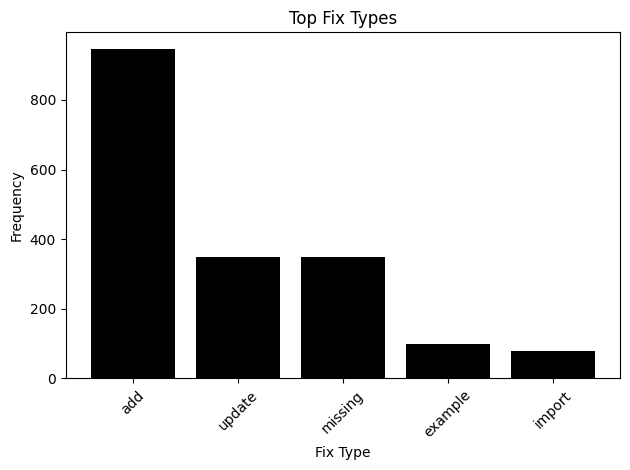

In [4]:
labels = [x for [x, _] in top_fix_types]
vals = [int(y) for [_, y] in top_fix_types]

plt.bar(labels, vals, color='black')
plt.xlabel("Fix Type")
plt.ylabel("Frequency")
plt.title("Top Fix Types")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Types of files modified.


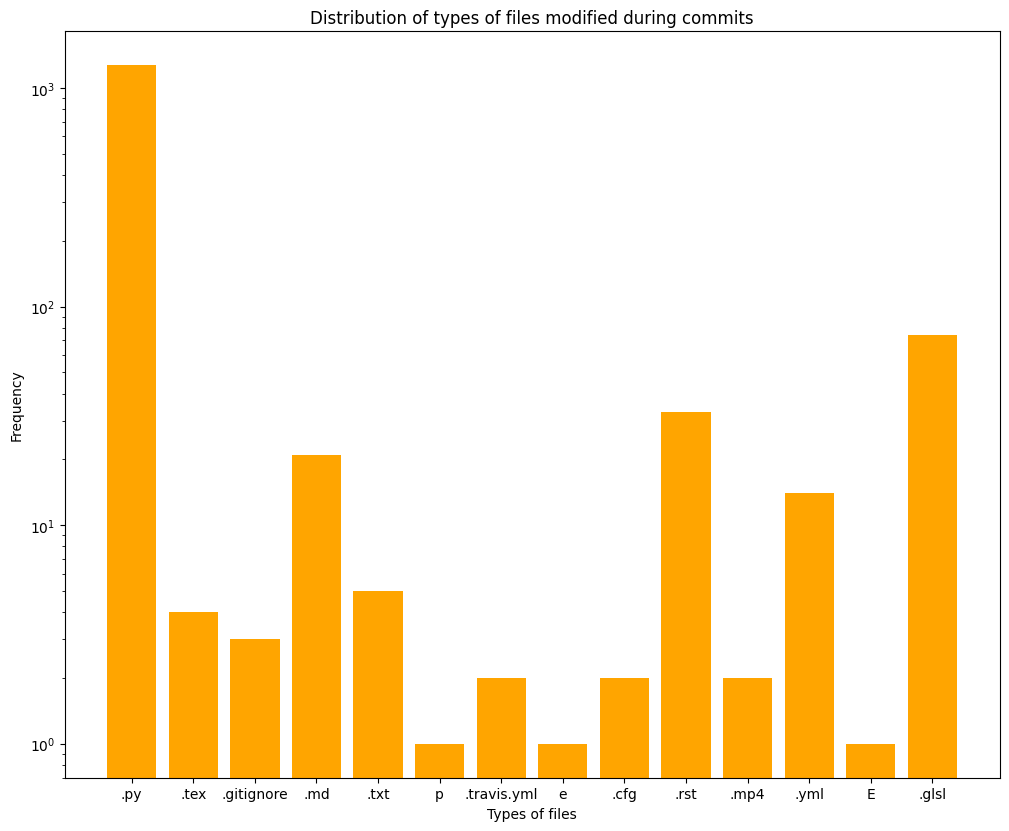

In [5]:
req = data['Filename'].apply(lambda x: x[x.find('.'):]).to_list()
plottable = Counter(req).items()
x = [x for x,_ in plottable]
y = [y for _, y in plottable]

plt.figure(figsize=(10, 8))
plt.bar(x, y, color ='orange', log=True)
plt.tight_layout()
plt.xlabel('Types of files')
plt.ylabel('Frequency')
plt.title('Distribution of types of files modified during commits')
plt.show()